<a href="https://colab.research.google.com/github/thekarthik003/Stock-Market-Forecasting/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2014-01-01'
end = '2024-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
data.reset_index(inplace = True)

In [6]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,27.782366,27.839401,27.603037,27.724083,27.692570,73129082
1,2014-01-03,27.770908,27.818977,27.520098,27.521841,27.490559,66917888
2,2014-01-06,27.721344,27.867046,27.557707,27.828691,27.797060,71037271
3,2014-01-07,28.019974,28.385853,27.924334,28.365179,28.332937,102486711
4,2014-01-08,28.543015,28.575891,28.226450,28.424210,28.391901,90036218
...,...,...,...,...,...,...,...
2667,2024-08-08,162.343994,165.500000,162.029999,163.839996,163.839996,15733600
2668,2024-08-09,161.645004,165.520004,160.929993,165.389999,165.389999,13549200
2669,2024-08-12,165.994995,166.699997,163.550003,163.949997,163.949997,12435000
2670,2024-08-13,165.184998,166.539993,164.770004,165.929993,165.929993,12717600


In [7]:
ma_100_days = data.Close.rolling(100).mean()

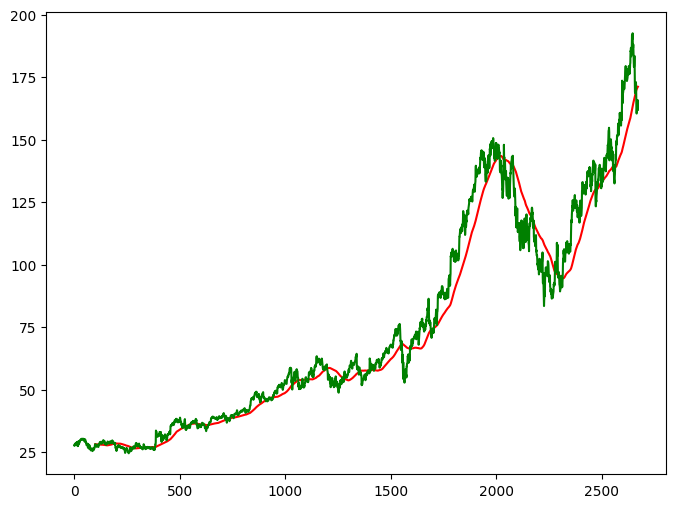

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
ma_200_days = data.Close.rolling(200).mean()

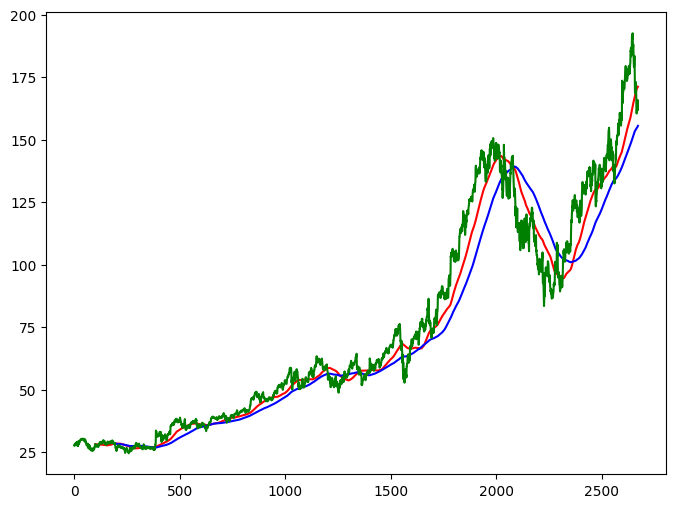

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [12]:
data.dropna(inplace=True)

 // If there are any missing values or duplicate values in the data,they are removed.

In [16]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

// Here I split the dataset into Training and Testing.

In [18]:
data_train.shape[0]

2137

// These are no.of.rows for training dataset

In [17]:
data_test.shape[0]

535

// These are the no.of.rows for testing dataset

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

// The MinMaxScaler is used to fit the data in between 0s and 1s.

In [20]:
data_train_scale = scaler.fit_transform(data_train)

In [21]:
x = []
y = []

for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

// Here in this array slicing , we calculate the first 100 days to predict the 101th day

In [23]:
x,y = np.array(x),np.array(y)

In [24]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

// Here I using Keras layers, because the output of one layer is becoming the input of another layer.

In [26]:
model = Sequential()
model.add(LSTM(units = 50, activation  = 'relu', return_sequences= True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 , activation = 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu' , return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


// Here I building the LSTM model by using 4 layers, each layer consists of a neuron.

In [27]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')

In [28]:
model.fit(x,y, epochs = 50, batch_size = 32,verbose = 1 )

Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 23s 266ms/step - loss: 0.0574
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 266ms/step - loss: 0.0067
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 263ms/step - loss: 0.0057
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 266ms/step - loss: 0.0061
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 23s 311ms/step - loss: 0.0048
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 22s 333ms/step - loss: 0.0049
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 40s 322ms/step - loss: 0.0046
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 265ms/step - loss: 0.0045
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 343ms/step - loss: 0.0047
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 36s 264ms/step - loss: 0.0037
Epoch 11/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - loss: 0.0035
Epoch 12/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 345ms/step - loss: 0.0039
Epoch 13/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 39s 311ms/step - loss: 0.0036
Epoch 14/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 294ms/step - loss: 0.0031
Epoch 15/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [30]:
pas_100_days = data_train.tail(100)

In [31]:
data_test = pd.concat([pas_100_days, data_test], ignore_index= True)

In [33]:
data_test_scale = scaler.fit_transform(data_test)

In [35]:
x = []
y = []

for i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])
x,y = np.array(x), np.array(y)

In [36]:
y_predict = model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step


In [40]:
scale = 1/scaler.scale_

In [41]:
y_predict = y_predict * scale

In [42]:
y = y*scale

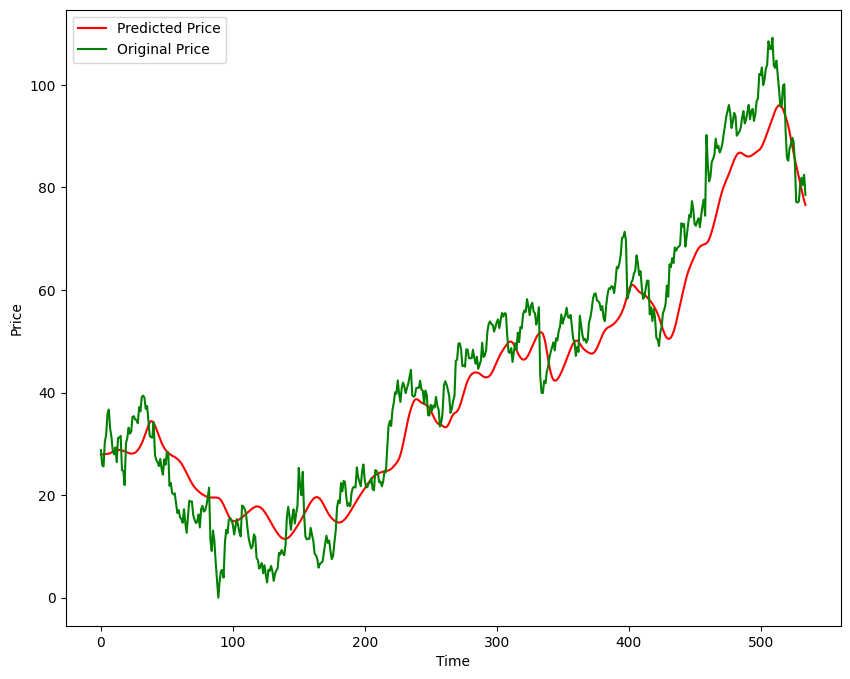

In [43]:
plt.figure(figsize = (10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [44]:
model.save('Stock Predictions Model.keras')